In [4]:
import yfinance as yf
import pandas as pd
import json
from typing import Union, Tuple
import numpy as np
import polars as pl
import datetime
pl.Config.set_tbl_rows(50)

pd.set_option('display.max_columns', None) # Show all columns

# generate me 10 popping colors
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

colors = ["#219ebc", "#ffb703", "#7209b7", "#023097",  "#f72585", "#8ecae6",   "#fb8500", "#3a0ca3",  "#4361ee", "#4cc9f0"]

pio.templates.default = "plotly_dark"

# add colors to the template
pio.templates[pio.templates.default].layout.update({"colorway": colors});

# Check the MSCI World ticker with the `yfinance` library

In [5]:
# Initialize the Ticker object
msci = yf.Ticker("^990100-USD-STRD")

In [6]:
fast_info = json.loads(msci.fast_info.toJSON())

Just check the fast info of the ticker

In [7]:
fast_info

{'currency': None,
 'dayHigh': 3559.739990234375,
 'dayLow': 3505.75,
 'exchange': 'MSC',
 'fiftyDayAverage': 3550.7292718654726,
 'lastPrice': 3558.02001953125,
 'lastVolume': 0,
 'marketCap': None,
 'open': 3552.35009765625,
 'previousClose': 3552.590087890625,
 'quoteType': 'INDEX',
 'regularMarketPreviousClose': 3552.0,
 'shares': None,
 'tenDayAverageVolume': 0,
 'threeMonthAverageVolume': 0,
 'timezone': 'America/New_York',
 'twoHundredDayAverage': 3425.168299233041,
 'yearChange': 0.2016645073750971,
 'yearHigh': 3661.5,
 'yearLow': 2724.89990234375}

We can check the history metadata which gives us some insights about the data. 

In [8]:
# we can pass the dictionary to the DataFrame constructor
# to get a nicer view of the data
pd.DataFrame([msci.history_metadata])

,currency,symbol,exchangeName,fullExchangeName,instrumentType,firstTradeDate,regularMarketTime,hasPrePostMarketData,gmtoffset,timezone,exchangeTimezoneName,regularMarketPrice,fiftyTwoWeekHigh,fiftyTwoWeekLow,regularMarketDayHigh,regularMarketDayLow,longName,shortName,chartPreviousClose,previousClose,scale,priceHint,currentTradingPeriod,tradingPeriods,dataGranularity,range,validRanges
0,None,^990100-USD-STRD,MSC,MSCI,INDEX,63262800,1726078065,False,-14400,EDT,America/New_York,3558.02,3559.74,3505.75,3559.74,3505.75,MSCI WORLD,MSCI WORLD,3518.6,3552.03,3,2,"{'pre': {'timezone': 'EDT', 'start': 172602720...","{'pre': [[{'timezone': 'EDT', 'start': 1725595...",1h,5d,"[1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, ..."


Checking the firstTradeDate attribute.

In [9]:
ftd = msci.history_metadata.get("firstTradeDate")

datetime.datetime.fromtimestamp(63262800)

datetime.datetime(1972, 1, 3, 6, 0)

Or we can just use the info method 😆

In [10]:
msci.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 3552.03,
 'open': 3552.35,
 'dayLow': 3505.75,
 'dayHigh': 3559.74,
 'regularMarketPreviousClose': 3552.03,
 'regularMarketOpen': 3552.35,
 'regularMarketDayLow': 3505.75,
 'regularMarketDayHigh': 3559.74,
 'fiftyTwoWeekLow': 2372.9,
 'fiftyTwoWeekHigh': 3559.74,
 'fiftyDayAverage': 2636.322,
 'twoHundredDayAverage': 2804.1274,
 'exchange': 'MSC',
 'quoteType': 'INDEX',
 'symbol': '^990100-USD-STRD',
 'underlyingSymbol': '^990100-USD-STRD',
 'shortName': 'MSCI WORLD',
 'longName': 'MSCI WORLD',
 'firstTradeDateEpochUtc': 63262800,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EDT',
 'uuid': 'f1f69aa1-fc8c-3c11-b128-30a7a50a6641',
 'gmtOffSetMilliseconds': -14400000,
 'trailingPegRatio': None}

We can just download the full history of the index using the history method of the msci ticker. 
To not send too much requests, it is better to persist the data as parquet for later use.

In [11]:
df = msci.history(period="max")

In [12]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1972-01-03 00:00:00-05:00,104.300003,104.300003,104.300003,104.300003,0,0.0,0.0
1972-01-04 00:00:00-05:00,104.599998,104.599998,104.599998,104.599998,0,0.0,0.0
1972-01-05 00:00:00-05:00,105.599998,105.599998,105.599998,105.599998,0,0.0,0.0
1972-01-06 00:00:00-05:00,110.800003,110.800003,110.800003,110.800003,0,0.0,0.0
1972-01-07 00:00:00-05:00,110.900002,110.900002,110.900002,110.900002,0,0.0,0.0


In [13]:
import os
from pathlib import Path
result_path = Path("data/msci_world_index.parquet")

if not os.path.exists(result_path):
    os.makedirs(result_path.parent, exist_ok=True)
    df.to_parquet(result_path)

In [14]:
# Read the parquet file
df = pd.read_parquet(result_path)

In [15]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-03 00:00:00-04:00,3659.500000,3661.500000,3584.199951,3595.399902,0,0.0,0.0
2024-09-04 00:00:00-04:00,3595.600098,3596.600098,3570.500000,3580.100098,0,0.0,0.0
2024-09-05 00:00:00-04:00,3579.100098,3591.399902,3558.899902,3567.500000,0,0.0,0.0
2024-09-06 00:00:00-04:00,3570.100098,3578.300049,3512.399902,3518.600098,0,0.0,0.0
2024-09-08 00:00:00-04:00,3570.060059,3578.270020,3512.399902,3518.580078,0,0.0,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13498 entries, 1972-01-03 00:00:00-05:00 to 2024-09-08 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          13498 non-null  float64
 1   High          13498 non-null  float64
 2   Low           13498 non-null  float64
 3   Close         13498 non-null  float64
 4   Volume        13498 non-null  int64  
 5   Dividends     13498 non-null  float64
 6   Stock Splits  13498 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 843.6 KB


# Creating API to work with the simulation 

To be able to easily work with different scenarios I built a python class which can be used to simulate different outcomes.

We need to initialize the class with the following parameters:
- **df:** The dataframe with the historical data of the index. It not necessarily needs to be the MSCI World Index, so it could be any historical data retrieved with the `yfinance` library.
- **invest_amount:** The amount of money we want to invest in the simulation. This will be used as the investment in every single month. 
- **day_to_invest:** The day of the month we want to invest. This could be any integer between 1 and 31. In case of the day is not vaild, the next available day will be used, with the exception of the last days, in case there are no more days in the month. In these cases, the last available day will be used.
- **period:** The time interval we want to simulate. This can be a string `max` or any start and end combination using `datetime.date` objects as a `tuple`.

# Data Preparation 

In [103]:
from typing import Union, Tuple
import numpy as np

class SavingPlan:
    """ 
    This class is used to calculate the total worth of a saving plan 
    that invests a fixed amount of money on a fixed day of the month.

    Parameters
    ----------
    df : pd.DataFrame
        A pandas DataFrame containing the stock data.
    invest_amount : int
        The amount of money to invest on the fixed day of the month.
    day_to_invest : int
        The day of the month to invest the money.
    period : str or Tuple[datetime.datetime, datetime.datetime]
        The period to consider. If a string is passed, the only available value is "max".
        If a tuple is passed, it should contain two datetime.datetime objects.
    
    Attributes
    ----------
    total_worth : float
        The total worth of the saving plan.    
    """
    def __init__(self, 
                 df: pd.DataFrame,
                 invest_amount: int,
                 day_to_invest: int,
                 period: Union[str, Tuple[datetime.datetime, datetime.datetime]]):
        self.df = df
        self.invest_amount = invest_amount
        self.day_to_invest = day_to_invest
        self.period = period

        if isinstance(self.period, str):
            assert self.period == "max", "If using string the only available value is 'max'"

        self.df = df

        if self.df.index.tz:
            self.df.index = self.df.index.tz_convert(None)
        
        if isinstance(self.period, tuple):
            self.df = self.df.loc[self.period[0]: self.period[1]]
            
    
        self.close_column = "Close"

        # self.prepared_df = self.prepare_data()

        self._total_worth = None

    @property
    def total_worth(self):
        if self._total_worth is None:
            self._total_worth = self.get_result_df().tail(1)["total_worth"].iloc[0].item()
        return self._total_worth

    def select_required_columns(self, df: pd.DataFrame) -> pd.DataFrame:
        columns_to_drop = [x for x in df.columns if x != self.close_column]
        return df.drop(columns_to_drop, axis=1)
    
    def rename_close(self, df) -> pd.DataFrame:
        return df.rename({self.close_column: "price"}, axis=1)

    def sort_date(self, df: pd.DataFrame) -> pd.DataFrame:
        return df.sort_index()

    def extract_day(self, df: pd.DataFrame) -> pd.DataFrame:
        """Add the day of the month to the DataFrame."""
        df["day"]=  df.index.day
        return df
    
    def extract_month(self, df: pd.DataFrame) -> pd.DataFrame:
        """Add the month to the DataFrame."""
        df["month"]=  df.index.month
        return df
    
    def extract_year(self, df: pd.DataFrame) -> pd.DataFrame:
        """Extract the year from the index."""
        df["year"]=  df.index.year
        return df
    
    def extract_dates(self, df: pd.DataFrame) -> pd.DataFrame:
        """Extract the day, month, and year from the index."""
        return (
            df
            .pipe(self.extract_day)
            .pipe(self.extract_month)
            .pipe(self.extract_year)
        )
    
    def drop_first_month_if_needed(self, df: pd.DataFrame) -> pd.DataFrame:
        """Drop the first month if it does not have the day to invest."""
        df["to_drop"] = np.where(
            (self.day_to_invest < self.df.index.date.min().day)
            & (self.period[0].month == df["month"])
            & (self.period[0].year == df["year"]),
            1,  0
        )

        return df.loc[df["to_drop"] == 0].drop("to_drop", axis=1)
    
    def drop_last_month_if_needed(self, df: pd.DataFrame) -> pd.DataFrame:
        """Drop the last month if it does not have the day to invest."""
        df["to_drop"] = np.where(
            (self.day_to_invest > self.df.index.date.max().day)
            & (self.period[1].month == df["month"])
            & (self.period[1].year == df["year"]),
            1,  0
        )

        return df.loc[df["to_drop"] == 0].drop("to_drop", axis=1)
    
    def get_prepared_df(self):
        return (
            self.df
            .pipe(self.sort_date)
            .pipe(self.select_required_columns)
            .pipe(self.rename_close)
            .pipe(self.extract_dates)
            .pipe(self.drop_first_month_if_needed)
            .pipe(self.drop_last_month_if_needed)
        )
    
    def get_diff(self, df: pd.DataFrame) -> pd.DataFrame:
        """Get the difference between the day and the day to invest."""
        df["diff"] = df["day"] - self.day_to_invest
        return df
    
    def filter_day_to_invest(self, df: pd.DataFrame) -> pd.DataFrame:

        # filter with the following expression
        condition = self.day_to_invest < df.groupby(['year', 'month'])['day'].transform('max')
        prepared_df = df[(condition & (df['diff'] >= 0)) | (~condition & (df['diff'] <= 0))]

        min_abs_diff = prepared_df.groupby(['year', 'month'])['diff'].transform(lambda x: x.abs().min())
        prepared_df = prepared_df[prepared_df['diff'].abs() == min_abs_diff]

        return prepared_df
    
    def get_result_df(self):
        return (
            self.get_prepared_df()
            .pipe(self.get_diff)
            .pipe(self.filter_day_to_invest)
            .pipe(self.add_number_of_stocks_bought)
            .pipe(self.add_number_of_stocks)
            .pipe(self.add_total_worth)
        )

    def add_real_day_to_invest(self, df: pd.DataFrame) -> pd.DataFrame:
        """Add the real day to invest to the DataFrame."""
        df["day_to_invest"] = df.groupby(pd.Grouper(freq="1ME"))["day_of_month"].transform(self._find_next_trading_day, day=self.day_to_invest)

        return df
    
    def add_saving(self, df:pd.DataFrame) -> pd.DataFrame:
        """Add the saving executed on the day to invest."""
        df.loc[df.day_of_month == df.day_to_invest, "invest_amount"] = self.invest_amount
        return df

    def add_number_of_stocks_bought(self, df: pd.DataFrame) -> pd.DataFrame:
        df["bought_stocks"] = self.invest_amount/ df["price"]
        return df
    
    def add_number_of_stocks(self, df: pd.DataFrame) -> pd.DataFrame:
        df["all_stocks"] = df["bought_stocks"].cumsum()
        return df
    
    def add_total_worth(self, df: pd.DataFrame) -> pd.DataFrame:
        df["total_worth"] = df["all_stocks"] * df["price"]
        return df


With the following initialization, we can build a `SavingPlan` object. With this object we get access to the total wort at the and of the defined period.

In [107]:
%%timeit
start = datetime.datetime(1972, 1, 3)
end = datetime.datetime(2024, 9, 4)
saving_plan = SavingPlan(df, 10, 22, period=(start, end))
saving_plan.total_worth

29.8 ms ± 350 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [108]:
start = datetime.datetime(1972, 1, 3)
end = datetime.datetime(2024, 9, 4)
saving_plan = SavingPlan(df, 10, 22, period=(start, end))

In [109]:
saving_plan.get_result_df()

,price,day,month,year,diff,bought_stocks,all_stocks,total_worth
Date,,,,,,,,
1972-01-24 05:00:00,111.000000,24,1,1972,2,0.090090,0.090090,10.000000
1972-02-22 05:00:00,115.000000,22,2,1972,0,0.086957,0.177047,20.360360
1972-03-22 05:00:00,117.800003,22,3,1972,0,0.084890,0.261936,30.856091
1972-04-24 05:00:00,119.900002,24,4,1972,2,0.083403,0.345339,41.406157
1972-05-22 04:00:00,121.900002,22,5,1972,0,0.082034,0.427374,52.096835
...,...,...,...,...,...,...,...,...
2024-04-22 04:00:00,3282.100098,22,4,2024,0,0.003047,18.144254,59551.258047
2024-05-22 04:00:00,3465.600098,22,5,2024,0,0.002886,18.147140,62890.728668
2024-06-24 04:00:00,3509.000000,24,6,2024,2,0.002850,18.149989,63688.312754


In [110]:
saving_plan.total_worth

65497.96736255751

The total worth can be accessed:

```python
saving_plan.total_worth
```

In the following code example we can iterate through on every possible day to create a saving plan. Than we can save the total worth in each loop to analyze the results.

In [111]:
result_dict = {}
for i in range(1, 32):
    saving_plan = SavingPlan(df, 100, i, (start, end))
    result_dict[i] = saving_plan.total_worth

# Visualizing the results

In [112]:
fig = go.Figure()

# period = "max"
start = datetime.datetime(1972, 1, 3)
end = datetime.datetime(2024, 9, 4)
period = (start, end)

total_worth_all = []
for i in range(1, 32):
    saving_plan = SavingPlan(df, 10, i, period)
    total_worth_all.append(saving_plan.total_worth)

In [113]:
def plot_total_worth(
        total_worth_all: list,
        title: str,
        period: str,):
    
    fig = go.Figure()

    fig.add_trace(
        go.Bar(
            x=list(range(1, 32)),
            y=total_worth_all, 
            name="Total Worth"))
    

    # update range for y
    fig.update_yaxes(
        tickformat="$,.0f",
        range=[np.min(total_worth_all) * 0.992, np.max(total_worth_all) * 1.002])

        # show all ticks for x
    fig.update_xaxes(tickmode="array", tickvals=list(range(1, 32)))

    if period == "max":
        period = "3/1/1972 - 3/9/2024"
    else:
        period = f"{period[0].strftime('%d/%m/%Y')} - {period[1].strftime('%d/%m/%Y')}"

    # update layout
    fig.update_layout(
        width=1000,
        height=500,
        title=title + f" ({period})",
        xaxis_title="Day of the Month",
        yaxis_title="Total Worth in USD",
        template="plotly_dark"
    )

    # add a horizontal line for the total worth
    fig.add_hline(
        y=np.max(total_worth_all), 
        line_dash="dash", 
        line_color="red", 
        annotation_text=f"Max Total Worth: {np.max(total_worth_all):.2f}", annotation_position="bottom right")

    # add horizontal line for the worst day
    worst_day = np.argmin(total_worth_all) + 1
    fig.add_hline(
        y=total_worth_all[worst_day - 1], 
        line_dash="dash", 
        line_color="yellow", 
        annotation_text=f"Min Total Worth: {np.min(total_worth_all):.2f}", annotation_position="top right")
    
    return fig


In [114]:
fig = plot_total_worth(total_worth_all, "Total Worth of a Saving Plan", period)
fig.show()

In [115]:
fig.write_image("assets/saving_plan_max_period.png")

# 15 year simulation

Just simulate the last 15 years 

In [116]:
start = datetime.date(2009, 9, 3)
end = datetime.date(2024, 9, 3)

total_worth_all = []
for i in range(1, 32):
    saving_plan = SavingPlan(df, 10, i, (start, end))
    total_worth_all.append(saving_plan.total_worth)

In [117]:
fig = plot_total_worth(total_worth_all, "Total Worth of a Saving Plan", period)
fig.show()

In [118]:
max(total_worth_all) - min(total_worth_all)

301.1137466858081

In [119]:
(1 - (min(total_worth_all) / max(total_worth_all)) )* 100

8.243781013515461

In [120]:
fig.write_image("assets/saving_plan_2009_2024.png")

## Checking the first 15 years

In [121]:
start = datetime.date(1972, 1, 3)
end = datetime.date(1987, 1, 3)

total_worth_all = []
for i in range(1, 32):
    saving_plan = SavingPlan(df, 10, i, (start, end))
    total_worth_all.append(saving_plan.total_worth)

fig = plot_total_worth(total_worth_all, "Total Worth of a Saving Plan", period)
fig.show()

In [122]:
fig.write_image("assets/saving_plan_1972_1987.png")

# Running the simulation for all possible 15 year periods

I want to run the simulation for all possible 15 years, which means we need to calculate the total worth quite a lot of times.
From this reason I rewrite the `SavingPlan` with only using numpy methods.

## Performance of the Saving Plan with `pandas`

In [124]:
%%timeit

saving_plan = SavingPlan(df, 10, 22, period=period)
saving_plan.total_worth

31.1 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The calculation of the total worth takes about **30 ms** for the max period. It seems to be quite fast, but we need to calculate the total worth for multiple thousands of times. 

## Using polars for better performance

In [125]:
import polars as pl 
df = pd.read_parquet("data/msci_world_index.parquet")

df.index = df.index.tz_convert(None)

pl_df = pl.DataFrame(df.reset_index()[["Date", "Close"]]).lazy()

In [126]:
import datetime
from typing import Tuple, Union
import polars as pl


class SavingPlan:
    def __init__(
        self,
        df: pl.DataFrame,
        invest_amount: int,
        day_to_invest: int,
        period: Union[str, Tuple[datetime.datetime, datetime.datetime]],
    ):
        self.df = df

        self.invest_amount = invest_amount
        self.day_to_invest = day_to_invest
        self.period = period

        if isinstance(self.period, str):

            assert (
                self.period == "max"
            ), "If using string the only available value is 'max'"
        else:
            self.df = df.filter(
                pl.col("Date").is_between(
                    pl.lit(self.period[0]), pl.lit(self.period[1])
                )
            )

        self._total_worth = None
        self._result_df = None

    @property
    def total_worth(self):
        if self._total_worth is None:
            self._total_worth = self.get_total_worth()
        return self._total_worth
    
    @property
    def result_df(self):
        if self._result_df is None:
            self._result_df = self.get_result_df()
        return self.get_result_df()

    def extract_year(self, col="Date"):
        return pl.col(col).dt.year().alias("year")

    def extract_month(self, col="Date"):
        return pl.col(col).dt.month().alias("month").cast(pl.Int32)

    def extract_day(self, col="Date"):
        return pl.col(col).dt.day().alias("day")

    def extract_dates(self, df: pl.DataFrame):
        return df.with_columns(
            self.extract_year(), self.extract_month(), self.extract_day()
        )

    def drop_first_month_if_needed(self, df: pl.DataFrame) -> pl.DataFrame:
        return df.with_columns(
            pl.when(
                pl.lit(self.day_to_invest).lt(pl.col("Date").min().dt.day())
                # .and_(pl.col("Date").min().dt.month().eq(pl.col("month")))
                # .and_(pl.col("Date").min().dt.year().eq(pl.col("year")))
                .and_(pl.lit(self.period[0]).dt.month().eq(pl.col("month")))
                .and_(pl.lit(self.period[0]).dt.year().eq(pl.col("year")))
            )
            .then(1)
            .otherwise(0)
            .alias("to_drop")
        ).filter(pl.col("to_drop") == 0)

    def drop_last_month_if_needed(self, df: pl.DataFrame) -> pl.DataFrame:
        return df.with_columns(
            pl.when(
                pl.lit(self.day_to_invest).gt(pl.col("Date").max().dt.day())
                # .and_(pl.col("Date").max().dt.month().eq(pl.col("month")))
                # .and_(pl.col("Date").max().dt.year().eq(pl.col("year")))
                .and_(pl.lit(self.period[1]).dt.month().eq(pl.col("month")))
                .and_(pl.lit(self.period[1]).dt.year().eq(pl.col("year")))
            )
            .then(1)
            .otherwise(0)
            .alias("to_drop")
        ).filter(pl.col("to_drop") == 0)

    def get_prepared_df(self) -> pl.DataFrame:
        prepared_df = (
            self.df.pipe(self.extract_dates)
            .pipe(self.drop_first_month_if_needed).pipe(self.drop_last_month_if_needed)
        )

        return prepared_df

    def get_result_df(self) -> pl.DataFrame:
        prepared_df = self.get_prepared_df()
        return (
            prepared_df.with_columns((pl.col("day") - pl.lit(self.day_to_invest)).alias("diff"))
            .filter(
                pl.when(
                    pl.lit(self.day_to_invest)
                    < pl.col("day").max().over("year", "month")
                )
                .then(pl.col("diff") >= 0)
                .otherwise(pl.col("diff") <= 0)
            )
            .filter(
                pl.col("diff").abs() == pl.col("diff").abs().min().over("year", "month")
            )
            .drop("year", "month", "day", "diff", "to_drop")
            # .drop("year", "month", "day", "diff")
            .with_columns((self.invest_amount / pl.col("Close")).alias("bought_stocks"))
            .with_columns(pl.cum_sum("bought_stocks").alias("all_stocks"))
            .with_columns((pl.col("all_stocks") * pl.col("Close")).alias("total_worth"))
            .with_columns(pl.lit(self.day_to_invest).alias("day_to_invest"))
        )

    def get_total_worth(self):
        return self.result_df.sort("Date").select("total_worth").collect()[-1].item()

In [127]:
start = datetime.datetime(1972, 1, 3)
end = datetime.datetime(2024, 9, 4)

period = (start, end)

In [130]:
%%timeit

saving_plan = SavingPlan(pl_df, 10, 22, period=period)
saving_plan.total_worth

1.48 ms ± 35 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Testing the method

Number of occurence for each day should be the same

In [134]:
number_of_data_points_per_day = {}

for i in range(1, 32):
    saving_plan = SavingPlan(pl_df, 10, i, period=period)
    number_of_data_points_per_day[i] = saving_plan.result_df.collect().shape[0]

In [135]:
number_of_data_points_per_day

{1: 632,
 2: 632,
 3: 633,
 4: 632,
 5: 632,
 6: 632,
 7: 632,
 8: 632,
 9: 632,
 10: 632,
 11: 632,
 12: 632,
 13: 632,
 14: 632,
 15: 632,
 16: 632,
 17: 632,
 18: 632,
 19: 632,
 20: 632,
 21: 632,
 22: 632,
 23: 632,
 24: 632,
 25: 632,
 26: 632,
 27: 632,
 28: 632,
 29: 632,
 30: 632,
 31: 632}

Every month should be present in the results only once

In [139]:
saving_plan.get_result_df().group_by(
    pl.col("Date").dt.year().alias("year"),
    pl.col("Date").dt.month().alias("month")).count().sort("year", "month").filter(pl.col("count") != 1).collect()

/var/folders/n0/_ynk_mts4cg0tzzzy408rqyh0000gn/T/ipykernel_2472/3117883915.py:3: DeprecationWarning:

`LazyGroupBy.count` is deprecated. It has been renamed to `len`.



year,month,count
i32,i8,u32


## Edge cases

In [185]:

start = datetime.datetime(1980, 1, 1)
end = datetime.datetime(2000, 1, 31)

saving_plan = SavingPlan(pl_df, 10, 31, period=(start, end))

There were some implementations where the end of the month could not been recognized. To check whether it is working now correctly, we can check whether every day is greater than 15. With 15 we can make sure that the day is not jumped to the beginning of the next month.

In [148]:
by = [pl.col("Date").dt.year().alias("year"), pl.col("Date").dt.month().alias("month")]

saving_plan.result_df.filter(pl.col("Date").dt.day() <= 15).collect()

Date,Close,bought_stocks,all_stocks,total_worth,day_to_invest
datetime[ns],f64,f64,f64,f64,i32


In [102]:
max_worth_all = [SavingPlan(pl_df, 10, i, period=period).total_worth for i in range(1, 32)]
plot_total_worth(max_worth_all, "Total Worth of a Saving Plan", period).show()

# Defining time periods

To be able to simulate the results for all 15 year time periods we need to define the possible time periods.

In [152]:
from collections import namedtuple
def get_time_periods(df:pd.DataFrame, period_years=15):
    """Get time periods of a fixed number of years."""

    last_end = df.index.max().date()
    periods = []
    Period = namedtuple("Period", ["start", "end"])
    for start in df.index:
        end = start + pd.DateOffset(years=period_years)
        if end.date() <= last_end:
            periods.append(Period(start.date(), end.date()))
        else:
            break

    return periods
        

In [153]:
time_periods = get_time_periods(df, 15)
time_periods[:3]

[Period(start=datetime.date(1972, 1, 3), end=datetime.date(1987, 1, 3)),
 Period(start=datetime.date(1972, 1, 4), end=datetime.date(1987, 1, 4)),
 Period(start=datetime.date(1972, 1, 5), end=datetime.date(1987, 1, 5))]

# Running the simulation for all the time periods

In [157]:
from tqdm import tqdm

def simulate_all_periods(df: Union[pd.DataFrame, pl.DataFrame], time_periods, invest_amount=10):
    """Simulate all periods of the saving plan.

    Args:
        df (Union[pd.DataFrame, pl.DataFrame]): stock data
        time_periods (list): list of namedtuples with the start and end of the period
        invest_amount (int, optional): The amount of investment which will be used each month. Defaults to 10.

    Returns:
        list: list of namedtuples with the day, period and total worth of the saving plan
    """

    SimRes = namedtuple("SimRes", ["day", "period", "total_worth"])

    for day in tqdm(range(1, 32), total=31):
        for period in time_periods:
            saving_plan = SavingPlan(df, invest_amount, day, period)
            yield SimRes(day, period, saving_plan.total_worth)

## Running the simulation

In [158]:
time_periods = get_time_periods(df, period_years=20)

result = simulate_all_periods(pl_df, time_periods)

The simulation is running in 9 minutes in my machine. It is not fast, however it would have been much slower with the previous implementation.
9 minutes is still acceptable compared to the 6X slower pandas implementation.

In the future I will might try `polars` to see if it can be even faster.

In [159]:
result_df = pd.DataFrame(result)

100%|██████████| 31/31 [05:12<00:00, 10.07s/it]


In [160]:
result_df["start"] = pd.to_datetime(result_df["period"].str.get(0), format="%Y-%m-%d")
result_df["end"] = pd.to_datetime(result_df["period"].str.get(1), format="%Y-%m-%d")
result_df.drop("period", axis=1, inplace=True)

In [161]:
result_df.to_parquet("data/simulation_result_20_years.parquet")

In [162]:
result_df = pd.read_parquet("data/simulation_result_20_years.parquet")

In [163]:
# result_df.to_parquet("data/simulation_result_with_smaller_min_date.parquet")

<Axes: xlabel='end'>

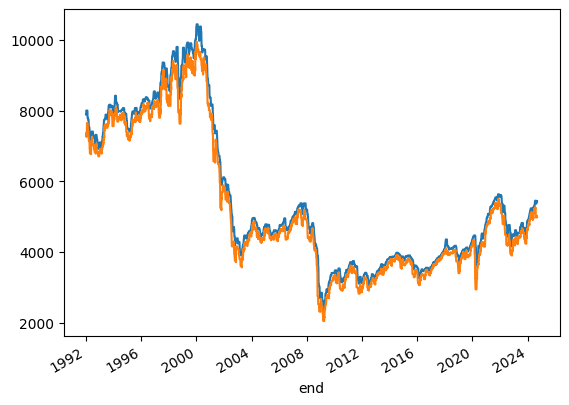

In [164]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()



max_worth = result_df.groupby("end")["total_worth"].max()
max_worth.plot(ax=ax)
min_worth = result_df.groupby("end")["total_worth"].min()
min_worth.plot(ax=ax)


In [167]:
values = 100 - min_worth / max_worth * 100

fig = px.histogram(values)

# change ticks to every second
tickvals = list(range(int(values.min()), int(values.max()), 1))
fig.update_xaxes(tickmode="array", tickvals=tickvals, showgrid=False)
fig.update_yaxes(showgrid=False)

# add vertical gridlines

# add q1 median and q3

# q1
q1 = values.quantile(0.25)
q3 = values.quantile(0.75)
plus_2_std = values.mean() + 2 * values.std()
minus_2_std = values.mean() - 2 * values.std()
median = values.median()
mean = values.mean()

fig.add_vline(x=q1, line_dash="dash", line_color="yellow", annotation_text=f"Q1: {q1:.2f}%", annotation_position="top left")
fig.add_vline(x=median, line_dash="dash", line_color="red", annotation_text=f"Median: {median:.2f}%", annotation_position="right")
fig.add_vline(x=q3, line_dash="dash", line_color="yellow", annotation_text=f"Q3: {q3:.2f}%", annotation_position="top right")
# fig.add_vline(x=mean, line_dash="dash", line_color="green", annotation_text=f"Mean: {mean:.2f}%", annotation_position="bottom right")
# fig.add_vline(x=plus_2_std, line_dash="dash", line_color="red", annotation_text=f"Mean + 2 Std: {plus_2_std:.2f}%", annotation_position="bottom left")
# fig.add_vline(x=minus_2_std, line_dash="dash", line_color="red", annotation_text=f"Mean - 2 Std: {minus_2_std:.2f}%", annotation_position="bottom left")

fig.update_traces(marker_line_width=1,marker_line_color="#252525")

fig.update_layout(
    width=1000,
    height=500,
    title="Distribution of max total worth difference in % for every possible 15 year period",
    xaxis_title="Total Worth Difference in %",
    yaxis_title="Frequency",
    template="plotly_dark",
    showlegend=False
)

In [168]:
fig.write_image("assets/max_total_worth_difference.png")

# Distirbution of best day to invest

In [169]:
result_df.head()

,day,total_worth,start,end
0,1,7898.094396,1972-01-03,1992-01-03
1,1,7898.094396,1972-01-04,1992-01-04
2,1,7898.094396,1972-01-05,1992-01-05
3,1,7898.094396,1972-01-06,1992-01-06
4,1,7898.094396,1972-01-07,1992-01-07


In [170]:
# find the day for each 'end' with the highest total worth
max_total_worth = result_df.groupby("end")["total_worth"].idxmax()

In [171]:
day_df = result_df.iloc[max_total_worth]

In [172]:
day_df

,day,total_worth,start,end
0,1,7898.094396,1972-01-03,1992-01-03
16891,3,7899.547893,1972-01-04,1992-01-04
16892,3,7899.547893,1972-01-05,1992-01-05
16893,3,7899.547893,1972-01-06,1992-01-06
42229,6,8009.877644,1972-01-07,1992-01-07
...,...,...,...,...
194230,23,5441.340562,2004-09-02,2024-09-02
194231,23,5441.340562,2004-09-03,2024-09-03
194232,23,5441.340562,2004-09-06,2024-09-06
194233,23,5441.340562,2004-09-07,2024-09-07


In [173]:
fig = px.histogram(day_df["day"]) 

# set xtickvals to every day
fig.update_xaxes(tickmode="array", tickvals=list(range(1, 32)), tickangle=-45)


fig.update_traces(marker_line_width=1,marker_line_color="#252525")

In [1308]:
# # distribution of 1 day is the best in time


# # filter to day one where day 1  is equal to the best day
# first_day_best_day = day_df.query("day == 1")

# fig = px.histogram(
#     first_day_best_day["end"],
#     nbins=50,
#     title="Number of periods where the 1 day was the best day per year",)

# fig.update_xaxes(tickmode="array", tickvals=first_day_best_day["end"].map(lambda x: x.year + 1).unique(), tickangle=-45, showgrid=True)


# fig.update_traces(marker_line_width=1,marker_line_color="#252525")
# fig.update_layout(
#     title="Distribution",
#     xaxis_title="End of the period",
#     yaxis_title="Number of periods",
#     )
# fig.show()

# Check outliers

In [174]:
pct_diff_df = result_df.groupby(["end"],as_index=False).agg({"total_worth": ["min", "max"]}).assign(diff_pct=lambda x: (x["total_worth"]["max"] - x["total_worth"]["min"]) / x["total_worth"]["max"] * 100)

In [175]:
pct_diff_df[pct_diff_df["diff_pct"] > 30].sort_values("diff_pct", ascending=False)

end  total_worth                diff_pct
                         min          max           
7294 2020-03-21  3033.111042  4417.221852  31.334419
7297 2020-03-24  2943.411865  4286.264119  31.329200
4362 2008-10-25  2633.146387  3820.515662  31.078770
7295 2020-03-22  3033.111042  4400.087145  31.067023
7296 2020-03-23  3033.111042  4400.087145  31.067023
7293 2020-03-20  3082.627488  4449.139662  30.714077
4363 2008-10-26  2633.146387  3793.618670  30.590114
4364 2008-10-27  2633.146387  3793.618670  30.590114
7292 2020-03-17  3122.696702  4462.316745  30.020730

In [176]:
result_df.query("end == '2020-03-24'")

/var/folders/n0/_ynk_mts4cg0tzzzy408rqyh0000gn/T/ipykernel_2472/1739988912.py:1: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



,day,total_worth,start,end
7297,1,4052.590876,2000-03-24,2020-03-24
15742,2,4048.148176,2000-03-24,2020-03-24
24187,3,3987.674768,2000-03-24,2020-03-24
32632,4,4106.442635,2000-03-24,2020-03-24
41077,5,4012.826195,2000-03-24,2020-03-24
49522,6,3933.269551,2000-03-24,2020-03-24
57967,7,3657.016884,2000-03-24,2020-03-24
66412,8,3657.118254,2000-03-24,2020-03-24
74857,9,3658.585271,2000-03-24,2020-03-24
83302,10,3765.727521,2000-03-24,2020-03-24


In [177]:
saving_plan_worst = SavingPlan(pl_df, 10, 22, (datetime.datetime(2005, 3, 24), datetime.datetime(2020, 3, 24)))
saving_plan_best = SavingPlan(pl_df, 10, 24, (datetime.datetime(2005, 3, 24), datetime.datetime(2020, 3, 24)))

In [178]:
best_df = saving_plan_best.result_df.collect()

In [179]:
worst_df = saving_plan_worst.result_df.collect()

In [180]:
best_df["Close"]

Close
f64
1145.900024
1134.599976
1144.900024
1150.599976
1179.199951
1189.900024
1213.099976
1180.900024
1242.699951


In [181]:
# plot the best and worst scenario

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=list(range(len(worst_df))),
        y=worst_df["Close"],
        mode="lines",
        name="Worst Scenario"))

fig.add_trace(
    go.Scatter(
        x=list(range(len(best_df))),
        y=best_df["Close"],
        mode="lines",
        name="Best Scenario"))


In [182]:
# saving_plan_worst = SavingPlan(pl_df, 10, 22, (datetime.datetime(2005, 3, 24), datetime.datetime(2020, 3, 24)))
saving_plan_best = SavingPlan(pl_df, 10, 24, (datetime.datetime(2005, 3, 24), datetime.datetime(2020, 4, 24)))

In [183]:
best_df = saving_plan_best.result_df.collect()

In [184]:
# plot the best and worst scenario

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=list(range(len(worst_df))),
        y=worst_df["Close"],
        mode="lines",
        name="Worst Scenario"))

fig.add_trace(
    go.Scatter(
        x=list(range(len(best_df))),
        y=best_df["Close"],
        mode="lines",
        name="Best Scenario"))


# Check a random one 

In [ ]:
values[:20]

In [1372]:
start = datetime.datetime(1972, 1, 21)
end = datetime.datetime(1987, 1, 21)



In [ ]:
result_df.query("start == @start & end == @end")

In [ ]:
test_df = result_df.query("start == @start & end == @end")

test_df.loc[test_df["total_worth"].idxmax()]


In [ ]:
test_df.loc[test_df["total_worth"].idxmin()]

In [1386]:
end = datetime.datetime(1987, 2, 21)

min_saving_plan = SavingPlan(pl_df, 1000, 31, (start, end)).result_df.collect()
# max_saving_plan = SavingPlan(pl_df, 1000, 17, (start, end)).result_df.collect()

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=list(range(len(min_saving_plan))),
        y=min_saving_plan["all_stocks"] * min_saving_plan["Close"],
        mode="lines",
        name="Min Scenario"))

fig.add_trace(
    go.Scatter(
        x=list(range(len(max_saving_plan))),
        y=max_saving_plan["all_stocks"] * max_saving_plan["Close"],
        mode="lines",
        name="Max Scenario"))

# Check the distribution of pct change

In [32]:
from tqdm import tqdm

def simulate_all_periods(df: Union[pd.DataFrame, pl.DataFrame], time_periods, invest_amount=10):
    """Simulate all periods of the saving plan.

    Args:
        df (Union[pd.DataFrame, pl.DataFrame]): stock data
        time_periods (list): list of namedtuples with the start and end of the period
        invest_amount (int, optional): The amount of investment which will be used each month. Defaults to 10.

    Returns:
        list: list of namedtuples with the day, period and total worth of the saving plan
    """


    for day in tqdm(range(1, 32), total=31):
        for period in time_periods:
            saving_plan = SavingPlan(df, invest_amount, day, period)
            yield saving_plan.result_df        

In [87]:
all_simulations = simulate_all_periods(pl_df, time_periods)

In [88]:
def get_pct_chgs(all_simulations):
    for sim in all_simulations:
        pct_chg = sim.select(pl.col("Close").pct_change().abs().mul(100)).collect().to_numpy().reshape(-1) 
        yield pct_chg

In [ ]:
pct_changes = get_pct_chgs(all_simulations)

In [ ]:
all_pct_chg = []
for k, pc in enumerate(pct_changes):
    
    if k == 20000:
        break
    else:
        all_pct_chg.append(pc)

In [91]:
data= np.concatenate(all_pct_chg)

In [ ]:
px.histogram(data, nbins=100)

In [93]:
sim = next(all_simulations)

In [1388]:
import plotly.express as px

saving_plan = SavingPlan(pl_df, 10, 1, "max")

In [ ]:
pct_chg_df = (
    saving_plan
    .result_df
    .with_columns(pl.col("Close").pct_change().abs().mul(100).alias("pct_change"))
    .collect())

pct_chg = pct_chg_df["pct_change"].to_numpy()

fig = px.histogram(pct_chg, nbins=100)
fig

In [19]:
x = saving_plan.prices[saving_plan.indices]

pct_change = np.abs((x[1:] - x[:-1]) / x[:-1]) * 100

In [ ]:
px.histogram(pct_change, nbins=80)



# Defining **all possible** time ranges but minimum of 15 years

In [31]:
def get_time_periods(df:pd.DataFrame, period_years=15):
    """Get time periods of a fixed number of years."""

    last_end = df.index.max().date()
    periods = []
    Period = namedtuple("Period", ["start", "end"])
    for start in df.index:
        end = start + pd.DateOffset(years=period_years)
        if end.date() <= last_end:
            periods.append(Period(start.date(), end.date()))
        else:
            break

    return periods

In [39]:

dates = pl_df.collect().get_column("Date").to_pandas()
max_end = dates.max().date()
min_end = dates.min().date() + pd.DateOffset(years=15)

min_end

Timestamp('1987-01-03 00:00:00')